# 0. Import Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time

sns.set_theme()

In [2]:
df = pd.read_csv('data/kill_match_stats_v2.csv')
df.head()

,killed_by,type,time,phase,dis,kx,ky,vx,vy
0,M16A4,AR,1035,2,194,4970,3126,4978,3320
1,AKM,AR,1422,4,7,4604,4147,4598,4144
2,AKM,AR,1210,3,8,4880,3472,4874,3477
3,SKS,DMR,1818,7,124,5011,4251,4930,4345
4,M416,AR,1766,7,85,4955,4298,4958,4383


# 3. Data Analyzing and Visualization
Ở phần này, nhóm sẽ thực hiện đặt một số câu hỏi có ý nghĩa và tìm câu trả lời từ dữ liệu

## 3.1. Câu hỏi 1
**Câu hỏi:** <span style = "color:red">Loại vũ khí nào hiệu quả nhất?</span>

**Ý nghĩa:** Khi tìm được loại vũ khí hiệu quả nhất, các player sẽ có sự lựa chọn loại vũ khí hợp lí cho chiến thuật của mình (vì mỗi player chỉ được trang bị 2 vũ khí chính, 1 `Handgun`, 1 `Melee` và 1 vũ khí ném (`Throwable`)), đặc biệt là với những player mới chơi, đang làm quen với game. Ở phần này nhóm chỉ phân tích độ hiệu quả của các loại vũ khí chính (trừ `Handgun`, `Melee`, `Throwable`, `Zone`, `Self`, `Vehicle`)

**Phân tích**: Để trả lời cho câu hỏi này, ta cần một thang đo độ hiệu quả. Khoảng cách và số lượng kill là 2 tiêu chí quan trọng để đánh giá độ hiệu quả của vũ khí. 
- Khoảng cách kill ngoài phụ thuộc vào vũ khí còn phụ thuộc vào trình độ của player cũng như vài yếu tố máy mắn khác, do đó ta sẽ sử dụng khoảng cách trung bình để đánh giá
- Số lượng kill ngoài cho biết loại vũ khí đó gây kill nhiều hay ít còn cho biết loại vũ khí nào được sử dụng nhiều hơn (nên gây kill nhiều hơn, vì nếu không gây kill hiệu quả thì các player sẽ đổi sang loại vũ khí hiệu quả hơn)
- Ngoài ra còn một số yếu tố khác như sát thương, độ giật. Tuy nhiên với dữ liệu nhóm đang có hiện tại, ta sẽ tạm phân tích dựa trên khoảng cách và số lượng kill

Vì vậy nhóm sẽ sử dụng heatmap để trực quan hóa độ hiệu quả của vũ khí như sau:
- Các dòng là các khoảng cách khác nhau:
    - 0m - 50m
    - 50m - 100m
    - 100 - 300m
    - 300 - 500m
    - Trên 500m
- Các cột là các loại vũ khí
- Mỗi cell giao của dòng với cột là số lượng kill của loại vũ khí ở khoảng cách tương ứng



In [41]:
cut_labels = ['0 - 50', '50 - 100', '100 - 300', '300 - 500', '> 500']
cut_bins = [0, 50, 100, 300, 500, 1000]
df['dis_bin'] = pd.cut(df['dis'], bins = cut_bins, labels = cut_labels)

Text(0.5, 11.249999999999995, '')

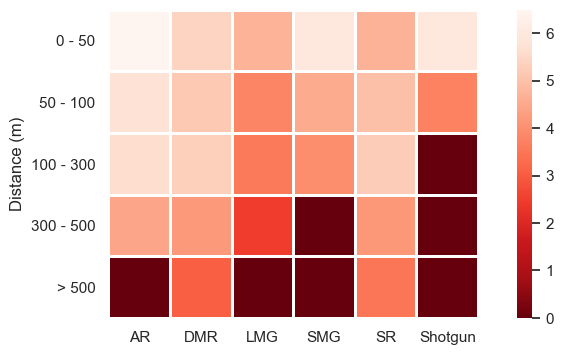

In [44]:
fig = plt.figure(figsize=(10, 4))

filter = ~df['type'].isin(['Zone', 'Self', 'Vehicle', 'Melee', 'Handgun', 'Throwable'])
data = df[filter][['type', 'dis_bin', 'killed_by']].groupby(['type', 'dis_bin']).count().reset_index()
data = pd.pivot(data, index = 'dis_bin', columns = 'type', values = 'killed_by')
ax = sns.heatmap(np.log10(data + 1), cmap = 'Reds_r', linewidths = 1)

ax.set_aspect('equal')
ax.set_ylabel('Distance (m)')
ax.set_xlabel('');